# Load libraries


In [1]:
import os
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [2]:
# Set the root directory to be able to access other folders in the project

CURR_DIR = os.getcwd()  # current working directory
BASE_DIR = Path(CURR_DIR).parent  # parent directory
print(BASE_DIR)

/home/adrien/Documents/Github/MFA/week_02


# Import data


The `MFA_II_tutorial_II.xlsx` contains inflow data about the funky furnitures of a mysterious hoarder.

![funky_furnitures](../img/funky_furnitures.png)


In [3]:
# Load the funky furnitures inflows and check your data
file_path = BASE_DIR / "data_input" / "MFA_II_tutorial_II.xlsx"
data = pd.read_excel(file_path, sheet_name="inflow_driven")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   year     61 non-null     int64  
 1   stock    0 non-null      float64
 2   inflow   61 non-null     int64  
 3   outflow  0 non-null      float64
dtypes: float64(2), int64(2)
memory usage: 2.0 KB


In [4]:
# set the index to year
data = data.set_index(["year"])

# define useful variables
years = data.index
end_year = years[-1]
print(f"end_year = {end_year}")

data

end_year = 2050


,stock,inflow,outflow
year,,,
1990,NaN,13,NaN
1991,NaN,14,NaN
1992,NaN,12,NaN
1993,NaN,10,NaN
1994,NaN,7,NaN
...,...,...,...
2046,NaN,66,NaN
2047,NaN,67,NaN
2048,NaN,70,NaN


In [5]:
time_max = data.shape[0]
timesteps = np.arange(0, time_max)

**Questions:**

1. What does `timesteps` refer to?
2. What is the value `time_max`?


**ANSWERS**


In [6]:
timesteps

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60])

**1. What does `timesteps` refer to?**

`timesteps` represents the discrete time steps corresponding to the rows in the dataset: from the position of the year 1990 (i.e. 0) up to the position of the year 2050 (i.e. 2050 - 1990 = 60).


In [7]:
time_max

61

**2. What is the value `time_max`?**

`time_max` represents the total number of rows (2050 - 1990 + 1 = 61)


# Survival curve


For now, just use the code below. We will dive into survival curves later on in the `week_2_survival_curves.ipynb` notebook.


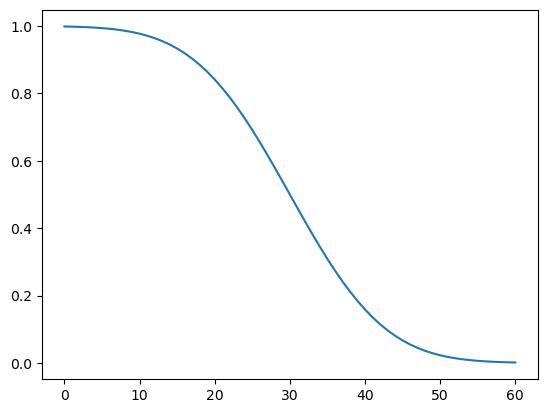

In [8]:
# Normal distribution
curve_surv = norm.sf(timesteps, loc=30, scale=10)

plt.plot(curve_surv)
plt.show()

# Survival curve matrix


![shifted_survival_curve](../img/shifted_survival_curve.png)


In [25]:
# create survival curve matrix filled with zeros
curve_surv_matrix = pd.DataFrame(0, index=timesteps, columns=timesteps, dtype=float)

# and populate that matrix
for time in timesteps:
    # at each iteration, we shift the survival curve
    shifted_curve_surv = curve_surv[0 : time_max - time]
    # and we fill the survival curve matrix with the shifted survival curve
    curve_surv_matrix.loc[time:time_max, time] = shifted_curve_surv

curve_surv_matrix

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.998650,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
1,0.998134,0.998650,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
2,0.997445,0.998134,0.998650,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
3,0.996533,0.997445,0.998134,0.998650,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
4,0.995339,0.996533,0.997445,0.998134,0.998650,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,0.004661,0.006210,0.008198,0.010724,0.013903,0.017864,0.022750,0.028717,0.035930,0.044565,...,0.993790,0.995339,0.996533,0.997445,0.998134,0.998650,0.000000,0.000000,0.000000,0.00000
57,0.003467,0.004661,0.006210,0.008198,0.010724,0.013903,0.017864,0.022750,0.028717,0.035930,...,0.991802,0.993790,0.995339,0.996533,0.997445,0.998134,0.998650,0.000000,0.000000,0.00000
58,0.002555,0.003467,0.004661,0.006210,0.008198,0.010724,0.013903,0.017864,0.022750,0.028717,...,0.989276,0.991802,0.993790,0.995339,0.996533,0.997445,0.998134,0.998650,0.000000,0.00000
59,0.001866,0.002555,0.003467,0.004661,0.006210,0.008198,0.010724,0.013903,0.017864,0.022750,...,0.986097,0.989276,0.991802,0.993790,0.995339,0.996533,0.997445,0.998134,0.998650,0.00000


# Flow driven model


![flow_driven_equations](../img/flow_driven_equations.png)


In [26]:
# This is our first model input
inflows = data["inflow"]
inflows

year
1990    13
1991    14
1992    12
1993    10
1994     7
        ..
2046    66
2047    67
2048    70
2049    77
2050    80
Name: inflow, Length: 61, dtype: int64

In [11]:
# And this is our second model input
curve_surv_matrix

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.998650,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
1,0.998134,0.998650,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
2,0.997445,0.998134,0.998650,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
3,0.996533,0.997445,0.998134,0.998650,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
4,0.995339,0.996533,0.997445,0.998134,0.998650,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,0.004661,0.006210,0.008198,0.010724,0.013903,0.017864,0.022750,0.028717,0.035930,0.044565,...,0.993790,0.995339,0.996533,0.997445,0.998134,0.998650,0.000000,0.000000,0.000000,0.00000
57,0.003467,0.004661,0.006210,0.008198,0.010724,0.013903,0.017864,0.022750,0.028717,0.035930,...,0.991802,0.993790,0.995339,0.996533,0.997445,0.998134,0.998650,0.000000,0.000000,0.00000
58,0.002555,0.003467,0.004661,0.006210,0.008198,0.010724,0.013903,0.017864,0.022750,0.028717,...,0.989276,0.991802,0.993790,0.995339,0.996533,0.997445,0.998134,0.998650,0.000000,0.00000
59,0.001866,0.002555,0.003467,0.004661,0.006210,0.008198,0.010724,0.013903,0.017864,0.022750,...,0.986097,0.989276,0.991802,0.993790,0.995339,0.996533,0.997445,0.998134,0.998650,0.00000


## Cohort matrix


In [27]:
# We create the cohort_surv_matrix filled with zeros
cohort_surv_matrix = pd.DataFrame(0, index=timesteps, columns=timesteps, dtype=float)

# And we populate it
for time in timesteps:
    # we scale the shifted survival curve with the inflow of the time-th year
    cohort_surv_matrix.loc[:, time] = curve_surv_matrix.loc[:, time] * inflows.iloc[time]

cohort_surv_matrix

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,12.982451,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,12.975744,13.981101,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,12.966783,13.973879,11.983801,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,12.954929,13.964228,11.977610,9.986501,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,12.939405,13.951462,11.969338,9.981342,6.990551,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,0.060595,0.086935,0.098370,0.107241,0.097324,0.357288,0.500503,0.660481,1.006049,1.336964,...,65.590162,63.701684,64.774647,69.821141,64.878722,65.910907,0.000000,0.000000,0.000000,0.000000
57,0.045071,0.065257,0.074516,0.081975,0.075069,0.278069,0.393017,0.523253,0.804064,1.077910,...,65.458963,63.602581,64.697023,69.757312,64.833917,65.876856,66.909557,0.000000,0.000000,0.000000
58,0.033217,0.048538,0.055934,0.062097,0.057383,0.214482,0.305876,0.410882,0.637004,0.861497,...,65.292209,63.475358,64.596372,69.673717,64.774647,65.831361,66.874991,69.905507,0.000000,0.000000
59,0.024256,0.035772,0.041604,0.046612,0.043468,0.163951,0.235930,0.319779,0.500204,0.682504,...,65.082372,63.313657,64.467160,69.565323,64.697023,65.771180,66.828806,69.869393,76.896058,0.000000


In [32]:
time = 2  # increase the time step to see how we populate the cohort_surv_matrix

print(f"Inflow = {inflows.iloc[time]}\n")

print("curve_surv_matrix:")
display(curve_surv_matrix.loc[:, :time].head(10))

print("cohort_surv_matrix:")
display(cohort_surv_matrix.loc[:, :time].head(10))

Inflow = 12

curve_surv_matrix:


,0,1,2
0,0.998650,0.000000,0.000000
1,0.998134,0.998650,0.000000
2,0.997445,0.998134,0.998650
3,0.996533,0.997445,0.998134
4,0.995339,0.996533,0.997445
5,0.993790,0.995339,0.996533
6,0.991802,0.993790,0.995339
7,0.989276,0.991802,0.993790
8,0.986097,0.989276,0.991802
9,0.982136,0.986097,0.989276


cohort_surv_matrix:


,0,1,2
0,12.982451,0.000000,0.000000
1,12.975744,13.981101,0.000000
2,12.966783,13.973879,11.983801
3,12.954929,13.964228,11.977610
4,12.939405,13.951462,11.969338
5,12.919274,13.934743,11.958396
6,12.893432,13.913065,11.944066
7,12.860587,13.885234,11.925484
8,12.819255,13.849862,11.901630
9,12.767763,13.805352,11.871311


**Questions:**

3. What is the length difference between `curve_surv_matrix.loc[:, time]` above and the `shifted_curve_surv` from cell 7 (`shifted_curve_surv = curve_surv[0 : time_max - time]`)? Why does that not change anything for our calculation?
4. What do the rows and columns of the Cohort matrix represent?
5. Compared to how Excel calculates the cohort matrix, how does our Python code do it?


**ANSWERS**


**3. What is the length difference? Why does that not change anything for our calculation?**

The length of `curve_surv_matrix.loc[:, time]` is `time_max` (=61) since we take the entire `time`-th column

The length of `shifted_curve_surv` was `time_max - time`  
(the formula was `shifted_curve_surv= curve_surv[0 : time_max - time]`).

However this does not change anything because the additional rows are filled with zeros.


**4. What do the rows and columns of the Cohort matrix represent?**

The **Cohort Matrix** tracks how materials that entered the system at different times (cohorts) survive and contribute to the in-use stock over time.

**Rows**: each row corresponds to a specific point in time (e.g., the state of the system in the year 2000). Reading across a row shows the age composition of the stock at that specific time.

For example, the row for year 2000 (r = 2000) contains the surviving amounts from the 1990 inflow, the 1991 inflow, and so on. Summing all values in that row gives the total stock for the year 2000.

**Columns**: each column corresponds to a specific inflow cohort (i.e., all material that entered the system at that time). Reading down a column tracks the survival of that single cohort over time.

For example, the column for year 2000 (c = 2000) shows the amount of the 2000 inflow cohort that survives in year 2000, how much of it survives in year 2001, and so on.


**5. Compared to how Excel calculates the cohort matrix, how does our Python code do it?**

With Python and Pandas, we can use slices to manipulate entire series (arrays) at once while in Excel it had to be cell by cell. Not only is it optimized and prevent circular reference errors, it is also closer to the conceptual model as presented in the equations: we manipulate **entire cohorts of inflows** as stand-alone individual items (i.e. each column in the pandas matrices has a meaning, it’s not just a collection of values in each individual cell).


<Axes: xlabel='year', ylabel='year'>

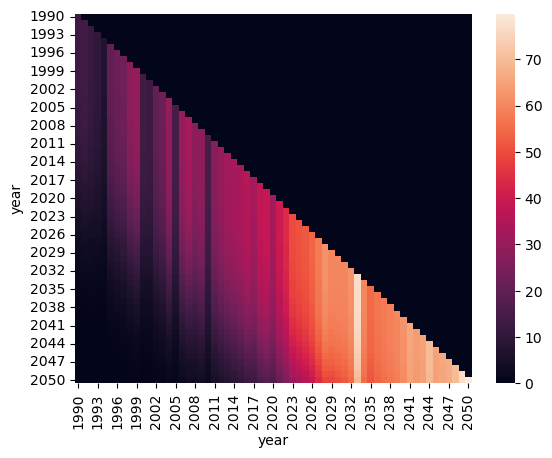

In [14]:
# set index and columns to actual years instead of timesteps
cohort_surv_matrix.index = years
cohort_surv_matrix.columns = years

# and visualize the cohort_surv_matrix with a heatmap
sns.heatmap(cohort_surv_matrix, annot=False)

## Stocks


$$
\begin{align}
\text{stock}(y) &= \sum_{t=0}^{y}{ \Bigl( \text{inflow}(t) \times \text{surv}(y-t)  \Bigr) } \\
&= \sum_{t=0}^{y}{\text{cohort}(t)}
\end{align}
$$


**Question:**

6. Using the formula above, calculate the stock time series

Tips: check the **Mean, sum, maximum and minimum** section of [Week 1 Pandas refresher](https://github.com/adrien-perello/MFA/blob/main/week_01/code/week_1_pandas_refresher_answers.ipynb)


In [35]:
# ! ANSWER
stock = cohort_surv_matrix.sum(axis=1)
stock

0       12.982451
1       26.956846
2       38.924463
3       48.883269
4       55.832098
         ...     
56    1632.747501
57    1661.970172
58    1692.892772
59    1729.492298
60    1767.759399
Length: 61, dtype: float64

## Net addition to stock


$$\text{NAS}(y) = \text{stock}(y) - \text{stock}(y-1)$$


**Question:**

7. Using the formula above, calculate the net addition to stock time series

Tips: check question 23 and 25 of the [Week 1 Pandas refresher](https://github.com/adrien-perello/MFA/blob/main/week_01/code/week_1_pandas_refresher_answers.ipynb)


In [37]:
# ! ANSWER
nas = np.diff(stock, prepend=0)  # prepending 0 assumes no initial stock
# nas = stock.diff()
nas

array([12.98245133, 13.97439453, 11.96761729,  9.95880563,  6.94882916,
       19.91470614, 21.88418871, 22.84623344, 27.79253282, 29.72821799,
       13.67180768, 12.58475195, 19.4681693 , 21.33275026, 29.16204168,
       13.98840743, 28.74733694, 31.47888755, 26.17832907, 26.82709233,
       12.44823209, 23.99159903, 26.4916524 , 27.93975774, 28.33588034,
       28.67957719, 29.9708901 , 26.21965524, 30.4138019 , 30.56985972,
       23.6978302 , 29.77923503, 32.83541015, 37.86583233, 37.88385836,
       37.88956334, 38.88606399, 41.87535665, 44.86206362, 41.85601228,
       40.85018064, 39.84686132, 40.84281463, 54.82078791, 36.83237098,
       30.82928052, 31.81103275, 31.78208628, 31.73782009, 31.67468527,
       32.5880805 , 35.4733696 , 32.33802441, 32.17109274, 35.96956943,
       29.75075605, 29.499005  , 29.22267114, 30.92260031, 36.59952545,
       38.26710146])

## Outflows


$$\text{outflow}(y) = \text{inflow}(y) - \text{NAS}(y)$$


**Question:**

8. Using the formula above, calculate the outflow time series


In [17]:
# ! ANSWER
outflows = inflows - nas
outflows

year
1990     0.017549
1991     0.025605
1992     0.032383
1993     0.041194
1994     0.051171
          ...    
2046    36.500995
2047    37.777329
2048    39.077400
2049    40.400475
2050    41.732899
Name: inflow, Length: 61, dtype: float64

## The entire flow driven model


In [18]:
# Load input data
file_path = BASE_DIR / "data_input" / "MFA_II_tutorial_II.xlsx"
data = pd.read_excel(file_path, sheet_name="inflow_driven")

# set the index to year
data = data.set_index(["year"])

# define useful variables
years = data.index
end_year = years[-1]
time_max = data.shape[0]
timesteps = np.arange(0, time_max)

# Create the survival curve
curve_surv = norm.sf(timesteps, loc=30, scale=10)

# create the survival curve matrix
curve_surv_matrix = pd.DataFrame(0, index=timesteps, columns=timesteps, dtype=float)
for time in timesteps:
    # Fill the survival curve matrix with the shifted survival curve
    curve_surv_matrix.loc[time:time_max, time] = curve_surv[0 : time_max - time]

# Define the input for the inflow-driven model
inflows = data["inflow"]

# Create the cohort_surv_matrix filled with zeros, and populate it
cohort_surv_matrix = pd.DataFrame(0, index=timesteps, columns=timesteps, dtype=float)
for time in timesteps:
    # Scale the shifted survival curve with the inflow of the time-th year
    cohort_surv_matrix.loc[:, time] = curve_surv_matrix.loc[:, time] * inflows.iloc[time]

# Set index and columns to actual years instead of timesteps
cohort_surv_matrix.index = years
cohort_surv_matrix.columns = years

# Compute the stock, nas, and outflows
data["stock"] = cohort_surv_matrix.sum(axis=1)
data["nas"] = np.diff(data["stock"], prepend=0)
data["outflow"] = data["inflow"] - data["nas"]

data

,stock,inflow,outflow,nas
year,,,,
1990,12.982451,13,0.017549,12.982451
1991,26.956846,14,0.025605,13.974395
1992,38.924463,12,0.032383,11.967617
1993,48.883269,10,0.041194,9.958806
1994,55.832098,7,0.051171,6.948829
...,...,...,...,...
2046,1632.747501,66,36.500995,29.499005
2047,1661.970172,67,37.777329,29.222671
2048,1692.892772,70,39.077400,30.922600


# Visualize the results


<Axes: xlabel='year'>

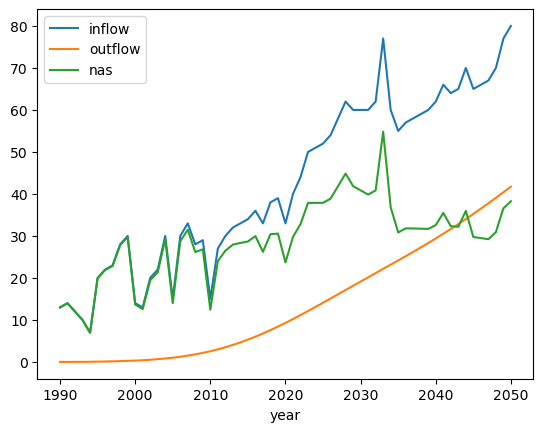

In [19]:
# Plot the evolution of the inflows, outflows and net addition to stock over time
# (on the same graph)

# ! ANSWER
data[["inflow", "outflow", "nas"]].plot()

<Axes: xlabel='year'>

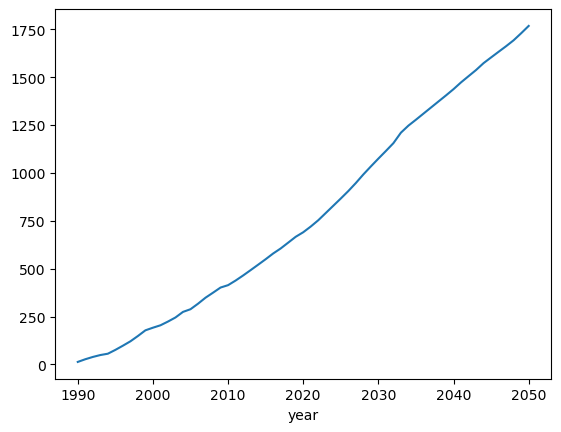

In [20]:
# Plot the evolution of the stock over time
data["stock"].plot()

<Axes: xlabel='year'>

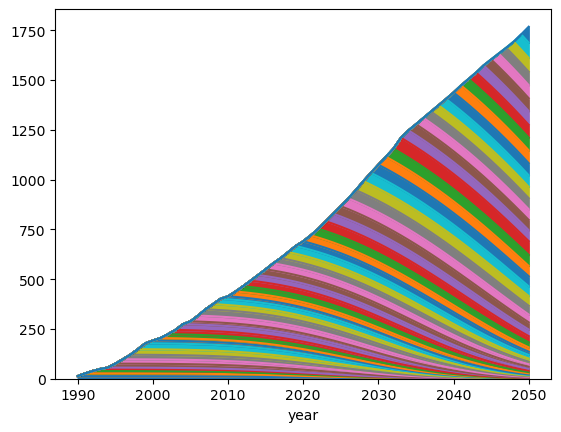

In [21]:
# Visualize the stock by cohort
cohort_surv_matrix.plot(kind="area", stacked=True, legend=False)

# Export output data to Excel


In [22]:
# Save the data to an Excel file
# (you may need to create the folder if it doesn't exist)
file_path = BASE_DIR / "data_output" / "week_2_tutorial_myname.xlsx"
data.to_excel(file_path, sheet_name="flow_driven")

In [23]:
# But we also want to save the cohort_surv_matrix data in the same excel file
# without overwriting the file.
# To do that, we open an Excel file in append mode ('a')
# https://pandas.pydata.org/docs/reference/api/pandas.ExcelWriter.html

with pd.ExcelWriter(file_path, mode="a") as writer:
    cohort_surv_matrix.to_excel(writer, sheet_name="cohort_surv_matrix_flow_driven")

# More information and tips


- [Statistical functions in scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html)
- [Pandas excel writer](https://pandas.pydata.org/docs/reference/api/pandas.ExcelWriter.html)
